# Exploration Exercises

## Tips

Create either a python script or a jupyter notebook named explore_tips that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.

You can load the data set like this:

import seaborn as sns

sns.load_dataset('tips')


In [3]:
# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import summarize
import prepare
import explore
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Hypothesis Testing = chi squared**

Ho: There is no relationship between smoker and time of day     
Ha: There is a relationship between smoker and time of day

In [13]:
# define the crosstab
observed = pd.crosstab(tips.time, tips.smoker)
# Set our alpha
alpha = .01
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [14]:
null_hypothesis = "Attrition and Business Travel are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We fail to reject the null hypothesis
0.4771485672079724


**We fail to reject the null hypothesis and conclude there is no relationship between smoker and time of day**

**Hypothesis Testing = t-test**

Ho: There Males tip the same or less than females on average     
Ha: Males tip higher than females on average

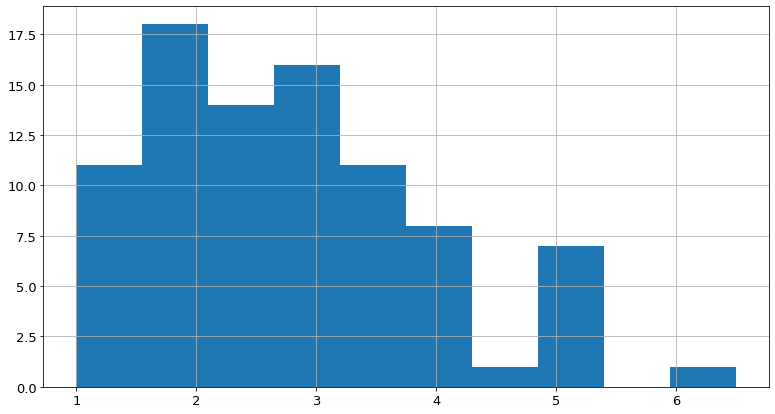

In [15]:
females = tips[tips.sex =='Female'].tip

females.hist()

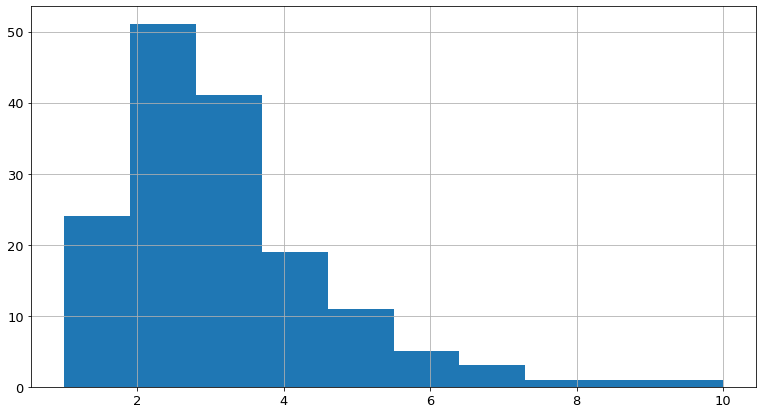

In [16]:
males = tips[tips.sex=='Male'].tip

males.hist()

In [17]:
alpha = .05
print(females.var())
print(males.var())

1.3444275060144353
2.2174242119875878


In [21]:
t, p = stats.ttest_ind(males, females, equal_var = False)
t, p/2

(1.489536377092501, 0.06890341904325148)

In [22]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

is p/2 < alpha?  False
is t > 0?  True
We fail to reject $H_{0}$


**We fail to reject the null hypothesis and conclude on average males do not tip more than females**

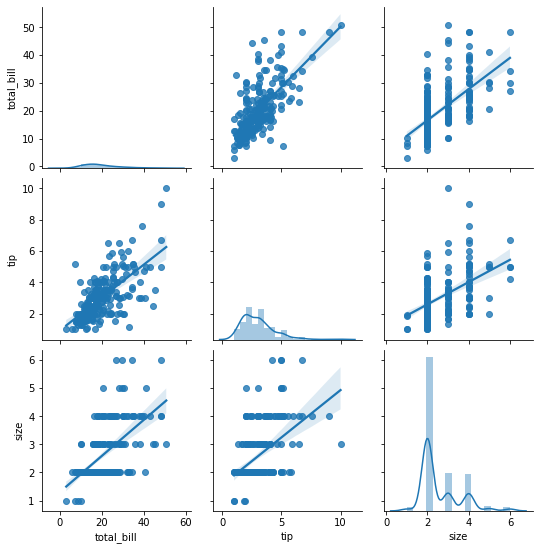

In [6]:
plots = explore.plot_variable_pairs(tips)

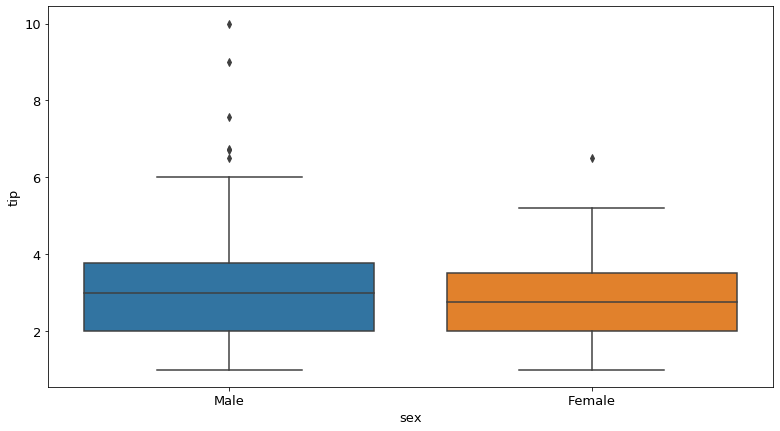

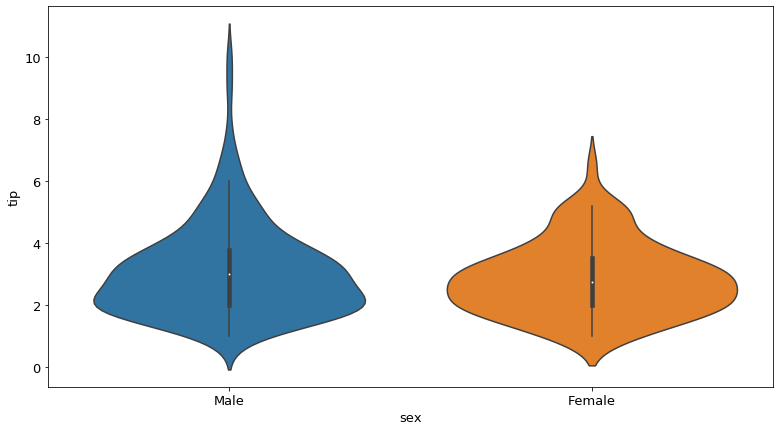

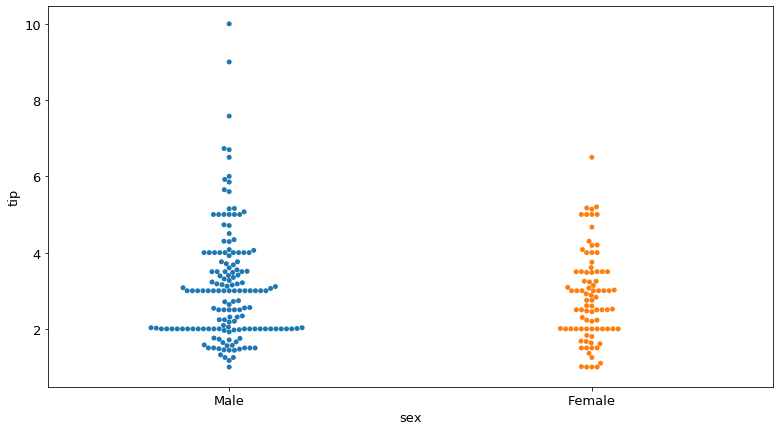

In [7]:
# gender with tip
categorical_var = tips.sex
continuous_var = tips.tip
gender_tip = explore.plot_categorical_and_continuous_vars(categorical_var, continuous_var, tips)

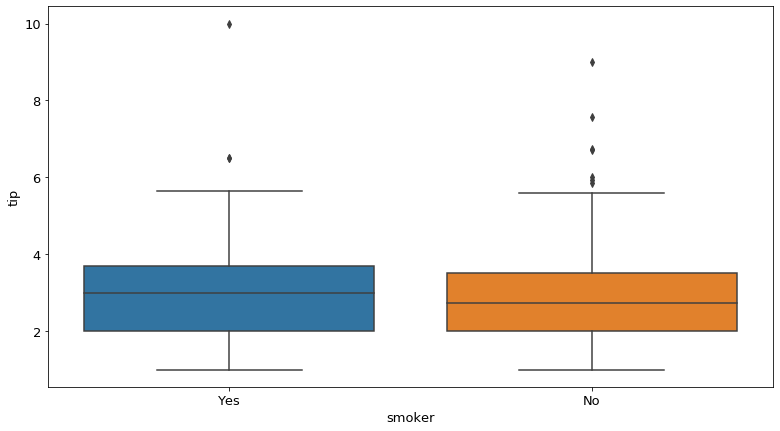

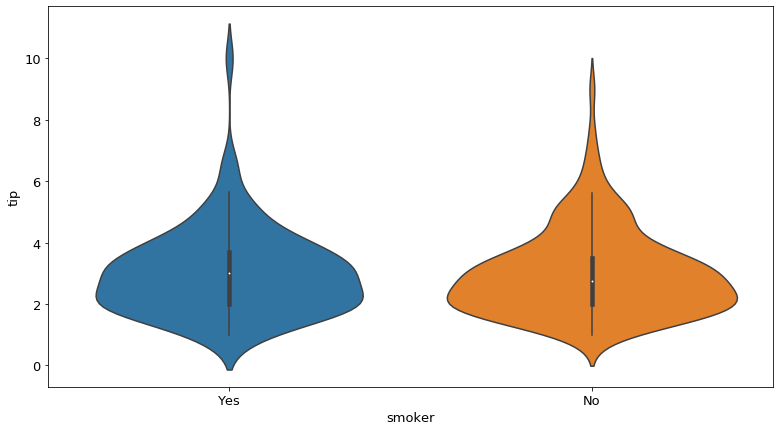

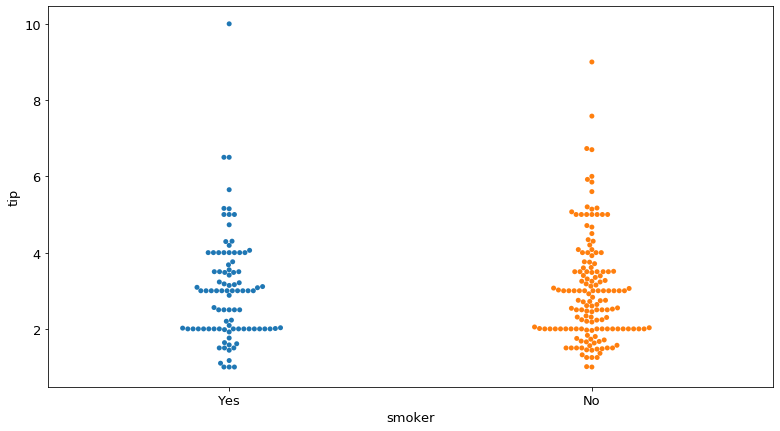

In [9]:
# smoker with tip
categorical_var = tips.smoker
continuous_var = tips.tip
smoker_tip = explore.plot_categorical_and_continuous_vars(categorical_var, continuous_var, tips)

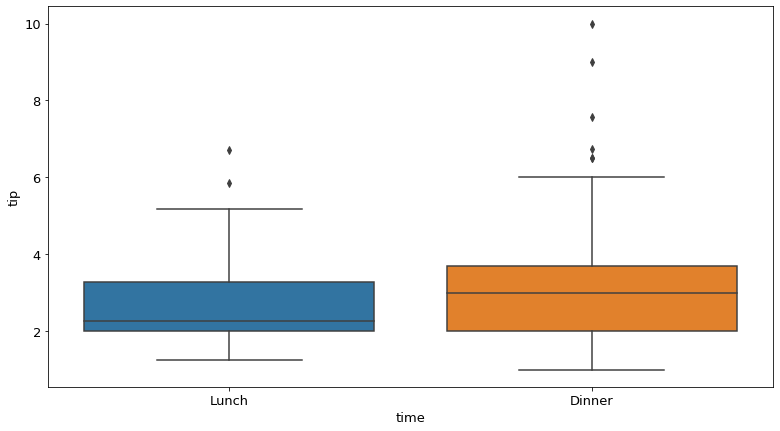

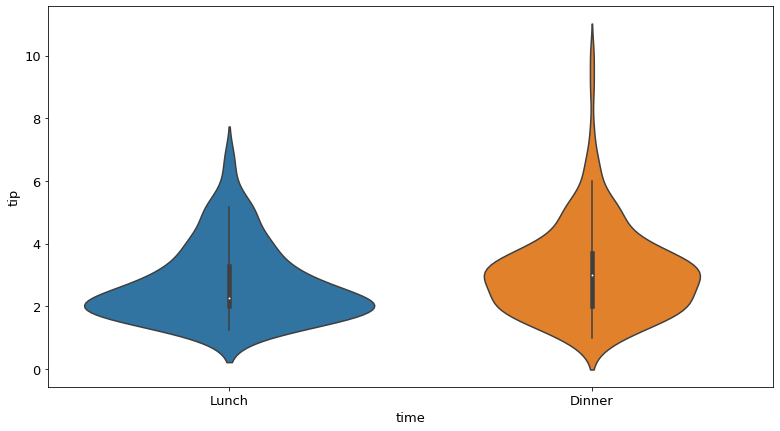

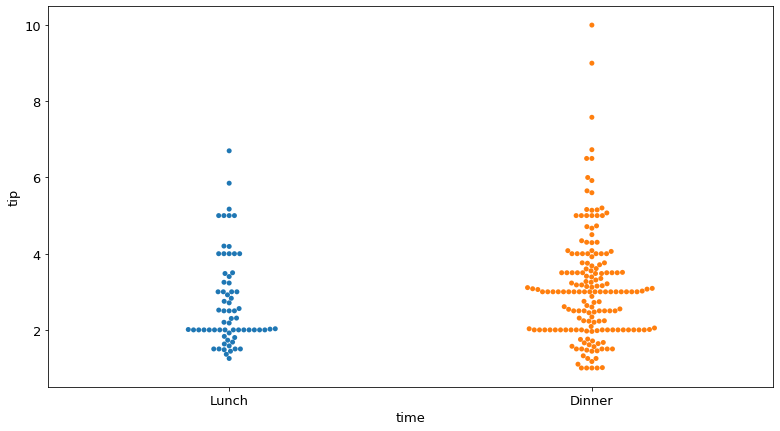

In [10]:
# time with tip
categorical_var = tips.time
continuous_var = tips.tip
smoker_tip = explore.plot_categorical_and_continuous_vars(categorical_var, continuous_var, tips)

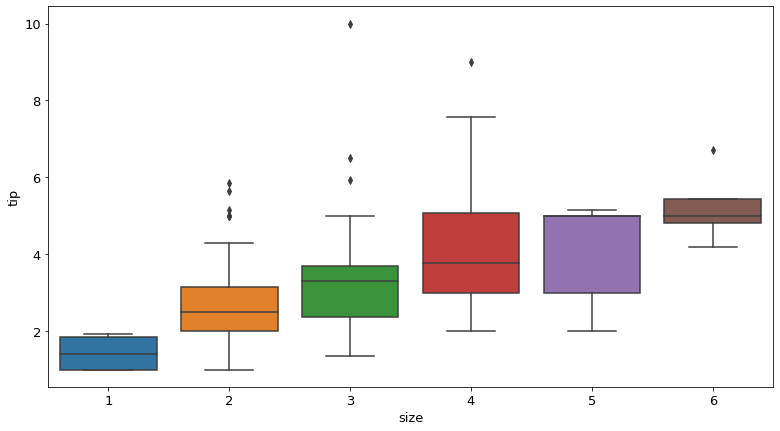

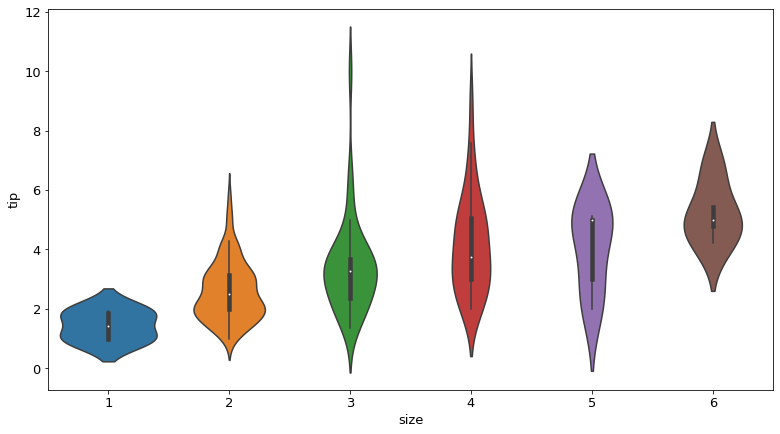

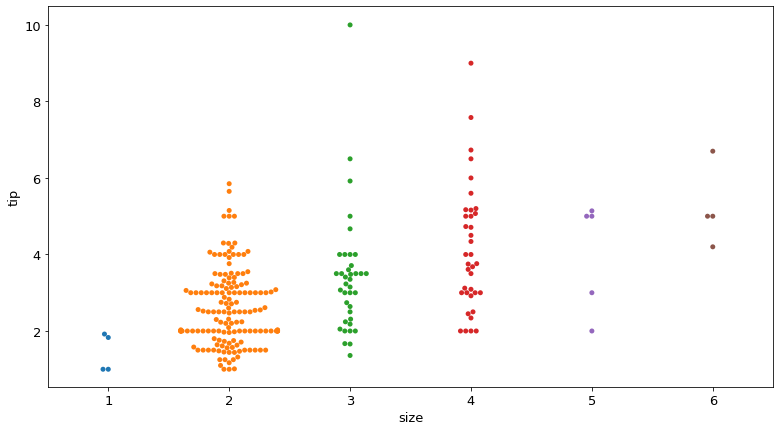

In [12]:
# size with tip
categorical_var = tips['size']
continuous_var = tips.tip
smoker_tip = explore.plot_categorical_and_continuous_vars(categorical_var, continuous_var, tips)